<img src="ArtSource_Logo_V3A2.png" style="width:1000px;">

#Importación de Librerias y Funciones Base

In [0]:
#En este bloque se importa todo lo necesario para la ejecución de operaciones relacionadas al proyecto.

#Se utiliza:
#OpenCV 2
#Funcionalidades del Sistema Operativo (OS)
#Funciones y parametros especificos del sistema (SYS)
#Numpy
#Pandas
#Matplotlib
#ipywidgets
#scikit-learn
#scikit-image
#SciPy
#TensorFlow
#Keras

import os
import sys
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as skl
import scipy as sp
import tensorflow as tf
import keras
import gc

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn.cluster import KMeans

from skimage import io
from skimage.color import rgb2gray
from skimage.feature import (match_descriptors, corner_harris, corner_peaks, ORB, plot_matches)

from imblearn.over_sampling import SMOTE

print('OpenCV: ', cv.__version__)
print('NumPy: ', np.__version__)
print('Pandas: ', pd.__version__)
print('SKlearn: ', skl.__version__)
print('Matplotlib: ', mpl.__version__)
print('SciPy: ', sp.__version__)
print('Python: ', sys.version)

%matplotlib inline

Using TensorFlow backend.


('OpenCV: ', '3.4.3')
('NumPy: ', '1.16.4')
('Pandas: ', u'0.24.2')
('SKlearn: ', '0.20.3')
('Matplotlib: ', '2.2.4')
('SciPy: ', '1.2.2')
('Python: ', '2.7.15+ (default, Nov 27 2018, 23:36:35) \n[GCC 7.3.0]')


In [0]:
from google.colab import drive #solo para colaboratory
drive.mount('/content/gdrive/') #solo para colaboratory

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
#En este bloque definimos una función que nos permite observar el progreso iterativo de ciclos en jupyter, usando python
#Fuente: https://github.com/kuk/log-progress

def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues , prnt_cm = False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        if prnt_cm:
            print("Normalized confusion matrix")
            print(cm)
    else:
        if prnt_cm:
            print('Confusion matrix, without normalization')
            print(cm)
       

    fig, ax = plt.subplots(figsize=(15, 15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, fraction=0.046, pad=0.04)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [0]:
  #En este bloque se extrae la información del dataset, el cual no es un dataset común de datos en texto, sino un grupo de
#imagenes organizado por carpetas, y cada carpeta está nombrada por su respectiva clase.

#Luego de extraer la información se manipula con filtros, especificamente: blur gaussiano, segmentación de otsu, y
#redimensionamiento. Luego se procede a dividir lo extraido en dos grupos, uno de entrenamiento con el 80%, y otro de prueba
#con el 20%.

#Por último, debido a limitaciones de capacidad de procesamiento, el dataset original se redujo a 100 imagenes por clase,
#para poder realizar las pruebas en un tiempo sensible, y hacer cambios de manera rápida, por lo cual la precisión al examinar
#los datos es generalmente baja.

#Fuente del dataset: https://github.com/cs-chan/ArtGAN/tree/master/WikiArt%20Dataset
#79306 imágenes distribuidas en 27 clases, la de menor cantidad tiene 98, y la de mayor cantidad tiene 13060

#Se define una función para procesar los datos, como parametros se incluye la dirección del dataset, el tamaño de kernel
#del filtro gaussiano, y la dimensión a la que se reduciran los datos

def LMID(path, kernel_size, resize_by):
    #Se crea un directorio según la ruta especificada
    classes_names = os.listdir(path)
    dic_imgs ={}
    print(classes_names)
    #Se guardan los strings de las subrutas del directorio en un diccionario
    for i, name_class in enumerate(classes_names):
        dic_imgs[classes_names[i]] = np.array(os.listdir(path + classes_names[i]))

    X =[]
    y =[]
    
    #Se empieza a iterar por cada clase en el diccionario
    for i, classes in log_progress(enumerate(classes_names), every = 1):
        print(classes)
        #Se itera por cada imágen en el estilo
        for im_name in log_progress(dic_imgs[classes], every = 1):
            #Se crea la ruta de la imágen para poder ser leída
            path_image = path+classes+'/'+im_name
            cvimg = cv.cvtColor(cv.imread(path_image, 1), cv.COLOR_BGR2RGB)
            cvblur = cv.GaussianBlur(cvimg, kernel_size, 0)
            
            #Si la imágen es muy grande se hace pasar por un resize
            if(cvimg.shape[1] > 800 or cvimg.shape[0] > 800):
                resize_x = int(cvimg.shape[1]/10)
                resize_y = int(cvimg.shape[0]/10)
                resizing_factor = (resize_by, resize_by) #(resize_x, resize_y)
                cvresize = np.uint8(cv.resize(cvblur, resizing_factor)*1.)
                flatt_img = cvresize.reshape(resizing_factor[0]*resizing_factor[1]*3) #(resize_x*resize_y*3)
            else:
                cvresize = np.uint8(cv.resize(cvblur, (resize,resize))*1.)
                flatt_img = cvresize.reshape(resize*resize*3)
                #flatt_img = cvimg.reshape(100*100*3) #(cvimg.shape[1]*cvimg.shape[0]*3)
            #ret,img = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
            X.append(flatt_img)
            y.append(i)

    X = np.r_[X]        
    y = np.r_[y]

    return X, y

In [0]:
def LMIDKeras(path, resize_by):
    classes_names = os.listdir(path)
    dic_imgs ={}
    print(classes_names)
    for i, name_class in enumerate(classes_names):
        dic_imgs[classes_names[i]] = np.array(os.listdir(path + classes_names[i]))

    X =[]
    y =[]

    for i, classes in log_progress(enumerate(classes_names), every = 1):
        print(classes)
        for im_name in log_progress(dic_imgs[classes], every = 1):
            path_image = path+classes+'/'+im_name        
        
            cvimg = cv.cvtColor(cv.imread(path_image, 1), cv.COLOR_BGR2RGB)

            if(cvimg.shape[1] > 800 or cvimg.shape[0] > 800):
                resize_x = int(cvimg.shape[1]/10)
                resize_y = int(cvimg.shape[0]/10)
                resizing_factor = (resize_by, resize_by) #(resize_x, resize_y)
                cvresize = np.uint8(cv.resize(cvimg, resizing_factor)*1.)
                flatt_img = cvresize.reshape(resizing_factor[0]*resizing_factor[1]*3) #(resize_x*resize_y*3)
            else:
                cvresize = np.uint8(cv.resize(cvimg, (resize,resize))*1.)
                flatt_img = cvresize.reshape(resize*resize*3)
                #flatt_img = cvimg.reshape(100*100*3) #(cvimg.shape[1]*cvimg.shape[0]*3)
            #ret,img = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
            X.append(cvresize)
            y.append(i)

    X = np.r_[X]        
    y = np.r_[y]

    return X, y

In [0]:
path_classes = 'gdrive/My Drive/CVAI/artsource_dataset/'
ker_size = 15
ker_size = (ker_size,) * 2
resize = 200
class_names = np.r_[os.listdir(path_classes)]

In [0]:
X, y = LMID(path_classes, ker_size, resize)

['Art_Nouveau_Modern', 'Expressionism', 'Action_painting', 'Cubism', 'Analytical_Cubism', 'Early_Renaissance', 'Color_Field_Painting', 'Abstract_Expressionism', 'Baroque', 'Contemporary_Realism', 'Fauvism', 'New_Realism', 'Pop_Art', 'Pointillism', 'Mannerism_Late_Renaissance', 'Naive_Art_Primitivism', 'Minimalism', 'High_Renaissance', 'Northern_Renaissance', 'Impressionism', 'Romanticism', 'Ukiyo_e', 'Synthetic_Cubism', 'Rococo', 'Realism', 'Post_Impressionism', 'Symbolism']


Art_Nouveau_Modern


Expressionism


Action_painting


Cubism


Analytical_Cubism


Early_Renaissance


Color_Field_Painting


Abstract_Expressionism


Baroque


Contemporary_Realism


Fauvism


New_Realism


Pop_Art


Pointillism


Mannerism_Late_Renaissance


Naive_Art_Primitivism


Minimalism


High_Renaissance


Northern_Renaissance


Impressionism


Romanticism


Ukiyo_e


Synthetic_Cubism


Rococo


Realism


Post_Impressionism


Symbolism


# KNN, GaussianNB, Random Forest, & SVM + Pipelines & GridSearch
## No corra las de SVC

##Matrices de Confusión

(2698, 120000)
0.11851851851851852


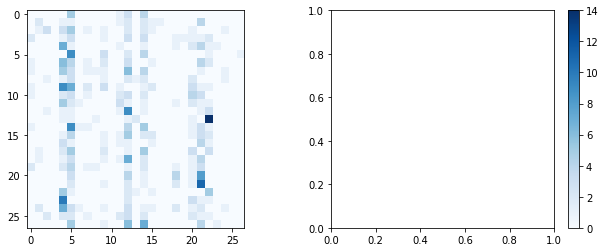

In [0]:
#En este bloque se importa el clasificador KNN, y se prosigue a realizar la clasificación con los dos grupos anteriores de
#entrenamiento y prueba, con los 10 vecinos más cercanos. Últimamente, para visualizar los resultados y su precisión, se imprime
#la matriz de confusión.

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

knn = KNeighborsClassifier(n_neighbors=21) #21 vecinos es lo mas óptimo
print(X.shape)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))



pred_train = knn.predict(X_train)
pred_test  = knn.predict(X_test)

cm_train_knn = confusion_matrix(y_train, pred_train)
cm_test_knn = confusion_matrix(y_test, pred_test)

plt.figure(figsize=(17,4))
plt.subplot(132),plt.imshow(cm_test_knn, interpolation="nearest", cmap=plt.cm.Blues);
plt.subplot(133),plt.colorbar();

In [0]:
#En este bloque, por curiosidad de saber que número de vecinos da mejores resultados al aplicar KNN, se hizo una prueba con
#su cantidad variando desde 1 hasta 20.
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

neighbors = np.linspace(1,30,30)
accuracy = []
for i in log_progress(range(30), every = 1):
    neigh = KNeighborsClassifier(n_neighbors = i+1)
    neigh.fit(X_train, y_train)
    accuracy.append(neigh.score(X_test, y_test))
    print(accuracy[i])
plt.plot(neighbors, accuracy)

Dimensiones en Train (2022, 120000) (2022,)
Dimensiones en Test (675, 120000) (675,)
Precisión en Train 0.17359050445103857
Precisión en Test 0.14814814814814814
Número de Imagenes por Clase en Test
[29 25 20 20 29 21 18 29 26 30 24 24 29 34 25 23 23 23 28 23 19 25 20 33
 20 28 27]


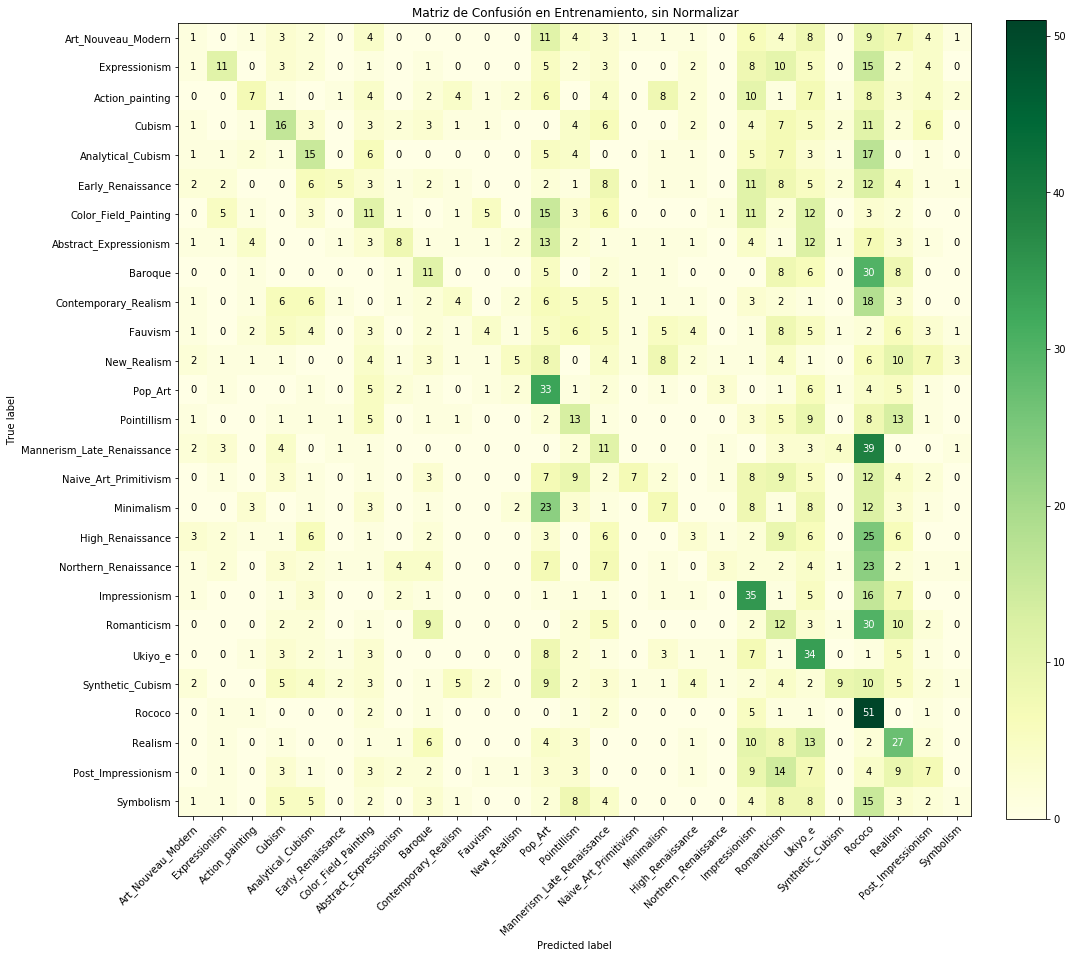

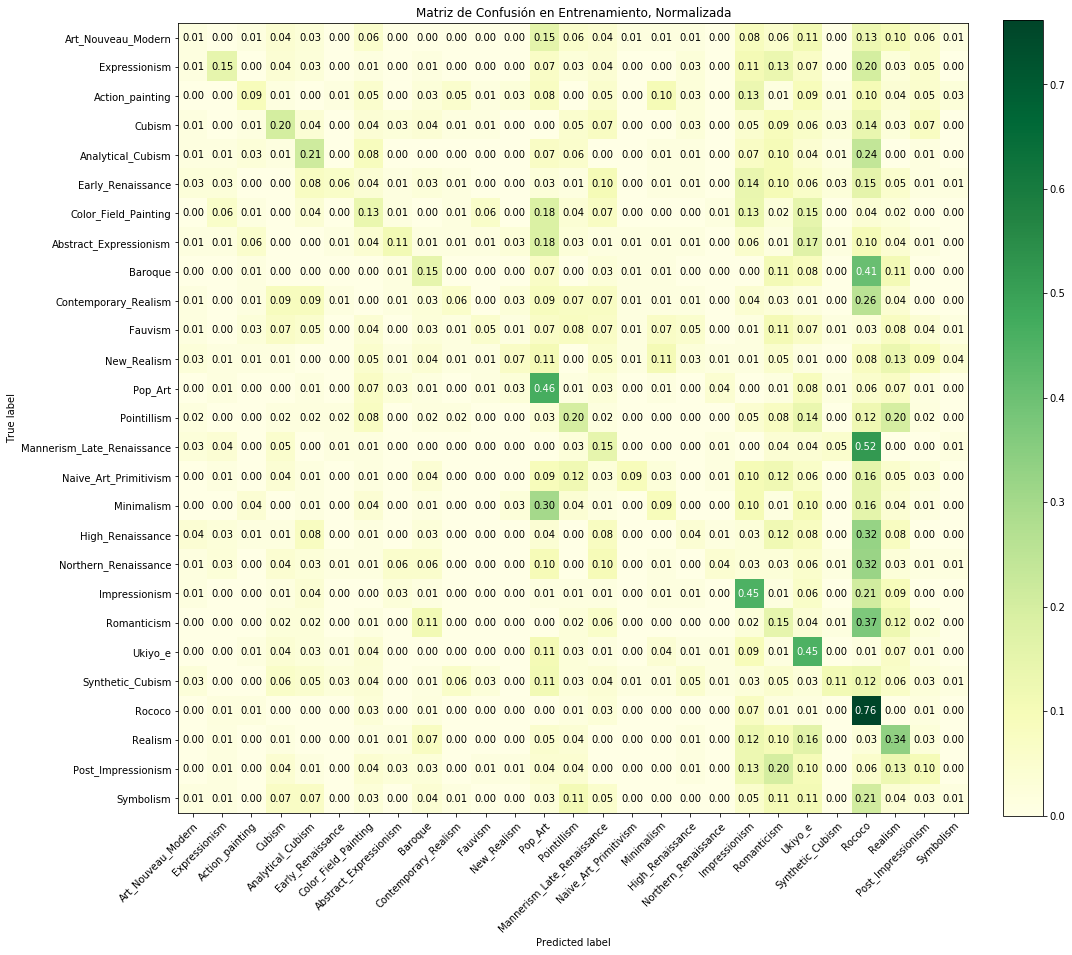

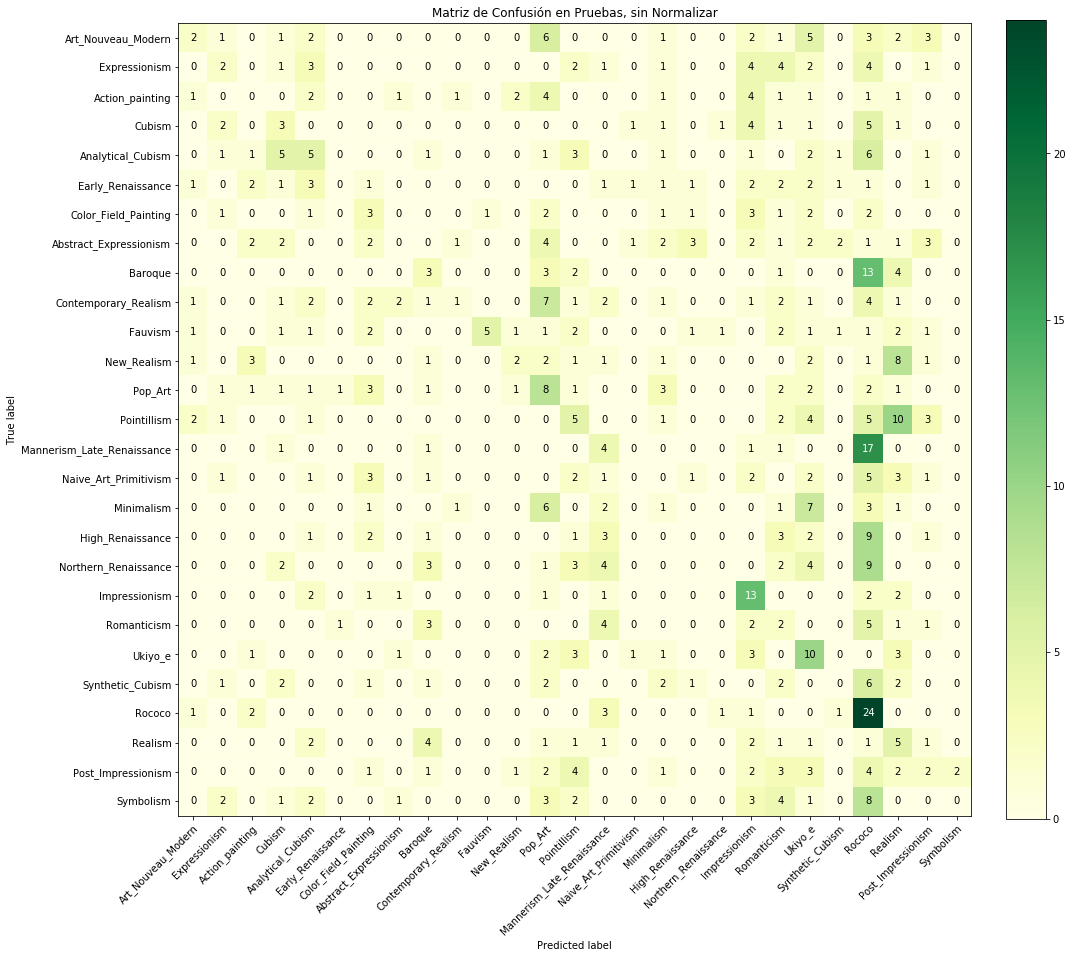

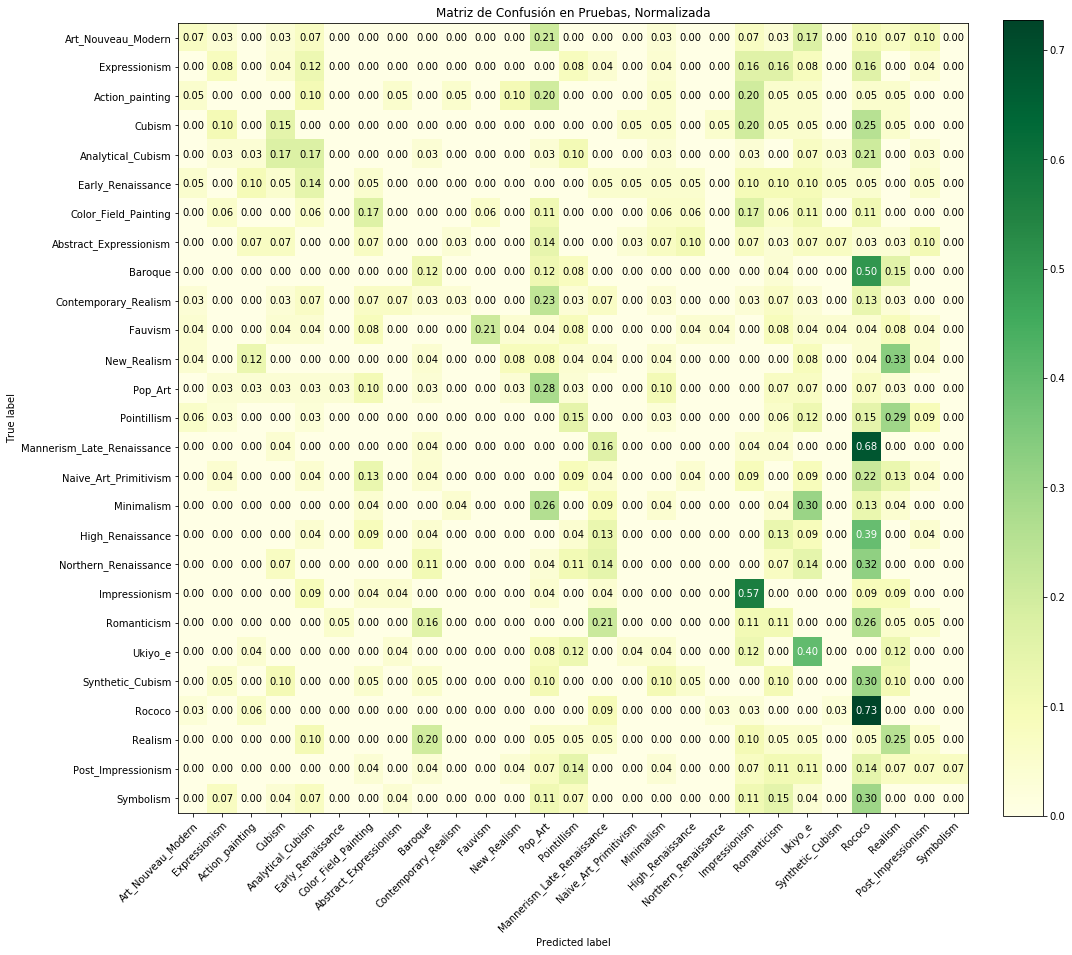

In [0]:
#A continuación, se hace el mismo experimento con un clasificador de Naive Bayes Gaussiano. Es muy similar al anteriormente
#implementado, solo se cambia la procprción del test_size y el clasificador
test_size = 0.25

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print("Dimensiones en Train", d_train.shape, c_train.shape)
print("Dimensiones en Test", d_test.shape, c_test.shape)

#Aca se inicializa el clasificador GNB
gnb = GaussianNB()
gnb.fit(d_train, c_train)
print("Precisión en Train", gnb.score(d_train, c_train))
print("Precisión en Test", gnb.score(d_test, c_test))

pred_train = gnb.predict(d_train)
pred_test  = gnb.predict(d_test)

cm_train = confusion_matrix(c_train, pred_train)
cm_test = confusion_matrix(c_test, pred_test)
print("Número de Imagenes por Clase en Test")
print(np.sum(cm_test, axis=1))

np.set_printoptions(precision=2)

plot_confusion_matrix(y_true = c_train,
                      y_pred = pred_train,
                      classes = class_names,
                      title = 'Matriz de Confusión en Entrenamiento, sin Normalizar',
                      normalize = False,
                      cmap = plt.cm.YlGn,
                      prnt_cm = False)

plot_confusion_matrix(y_true = c_train,
                      y_pred = pred_train,
                      classes = class_names,
                      title = 'Matriz de Confusión en Entrenamiento, Normalizada',
                      normalize = True,
                      cmap = plt.cm.YlGn,
                      prnt_cm = False)

plot_confusion_matrix(y_true = c_test,
                      y_pred = pred_test,
                      classes = class_names,
                      title = 'Matriz de Confusión en Pruebas, sin Normalizar',
                      normalize = False,
                      cmap = plt.cm.YlGn,
                      prnt_cm = False)

plot_confusion_matrix(y_true = c_test,
                      y_pred = pred_test,
                      classes = class_names,
                      title = 'Matriz de Confusión en Pruebas, Normalizada',
                      normalize = True,
                      cmap = plt.cm.YlGn,
                      prnt_cm = False)
plt.show()

Dimensiones en Train (2022, 120000) (2022,)
Dimensiones en Test (675, 120000) (675,)
Precisión en Train 0.9945598417408507
Precisión en Test 0.18518518518518517


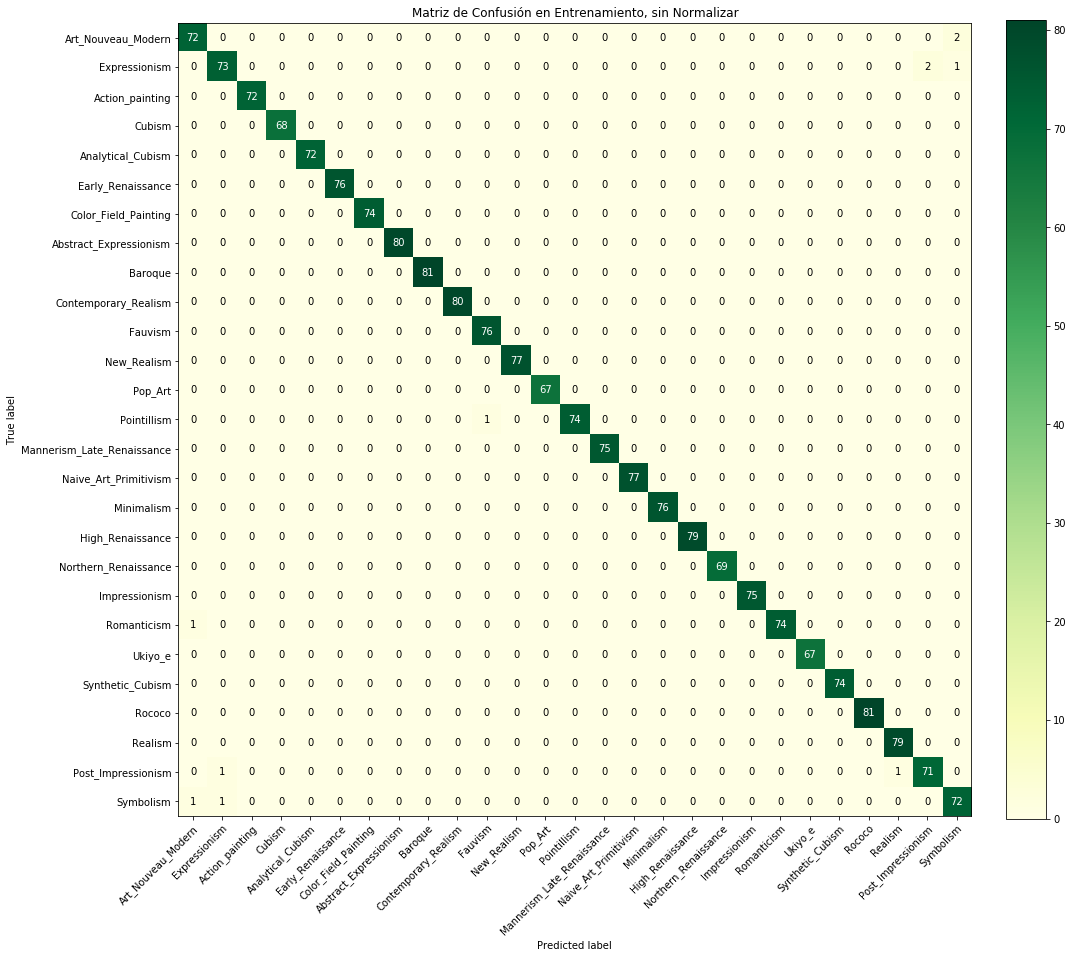

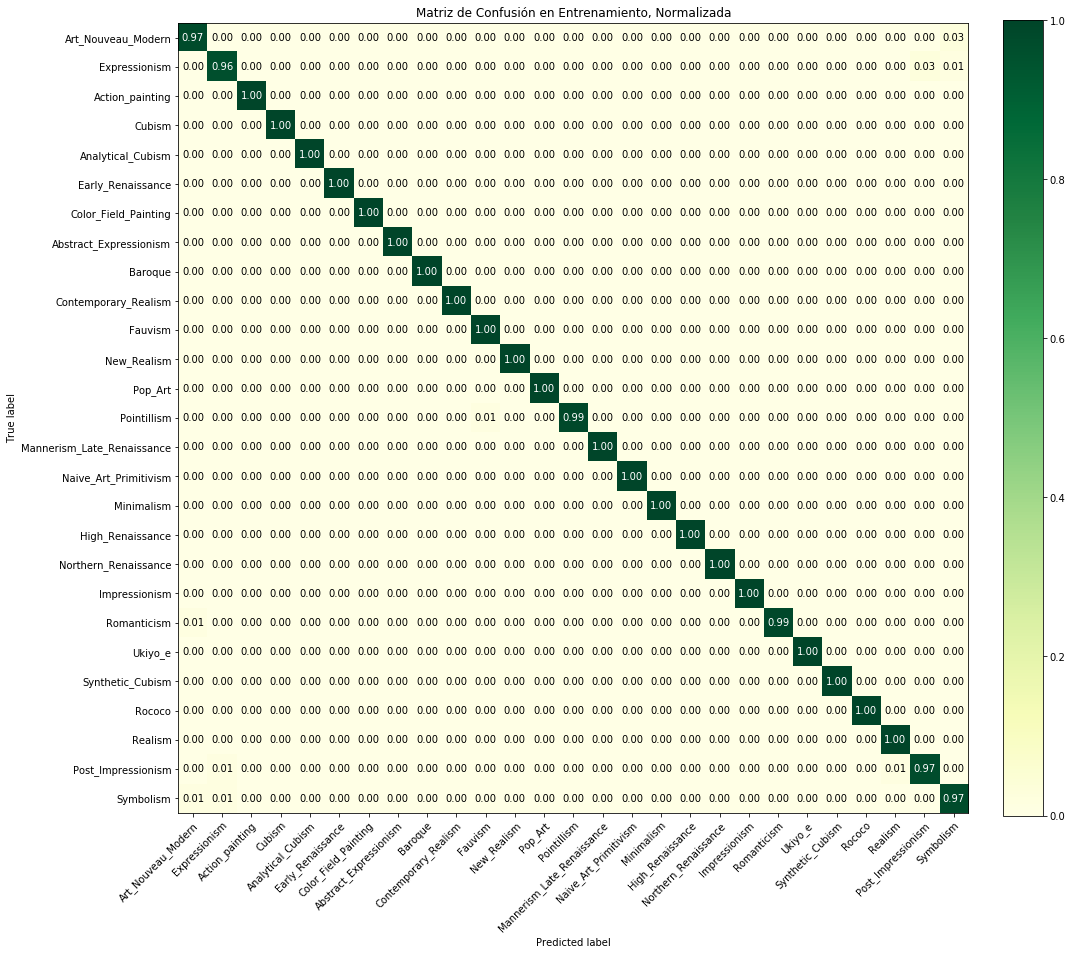

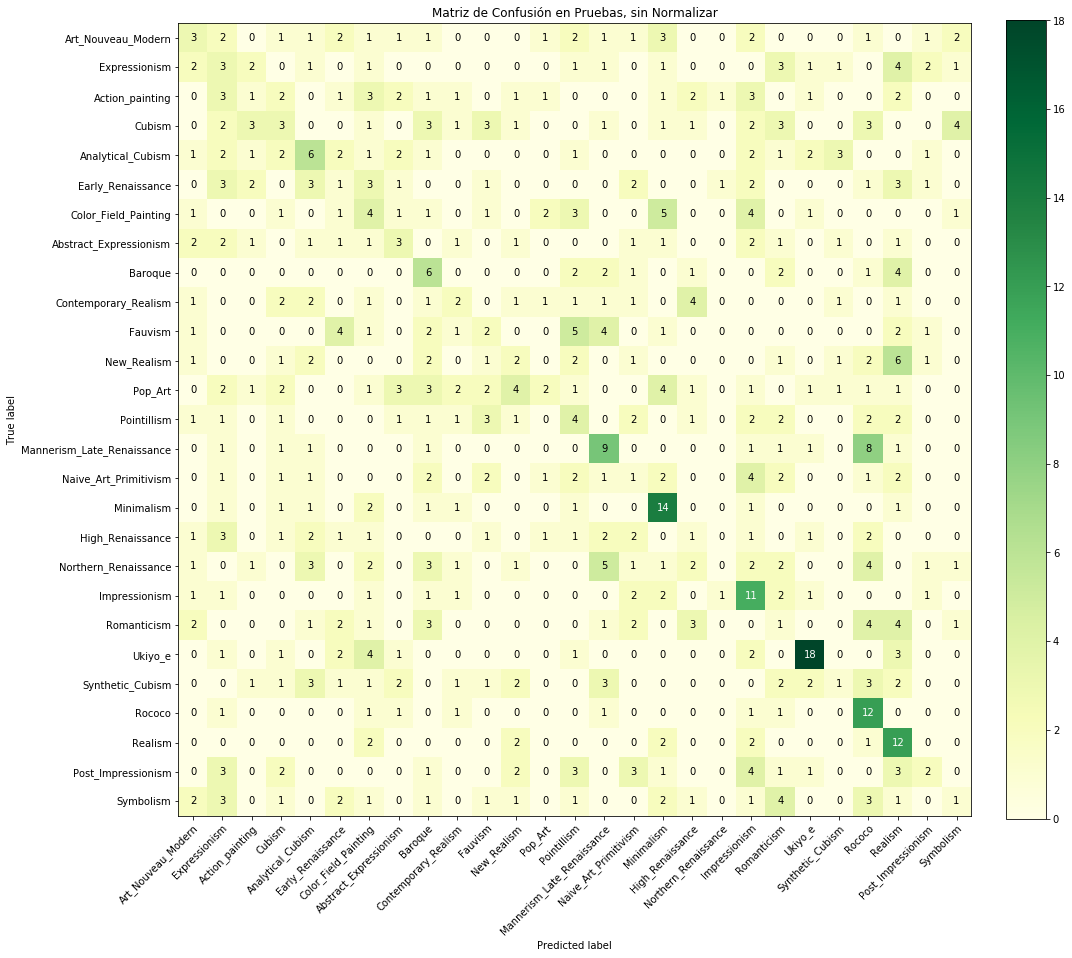

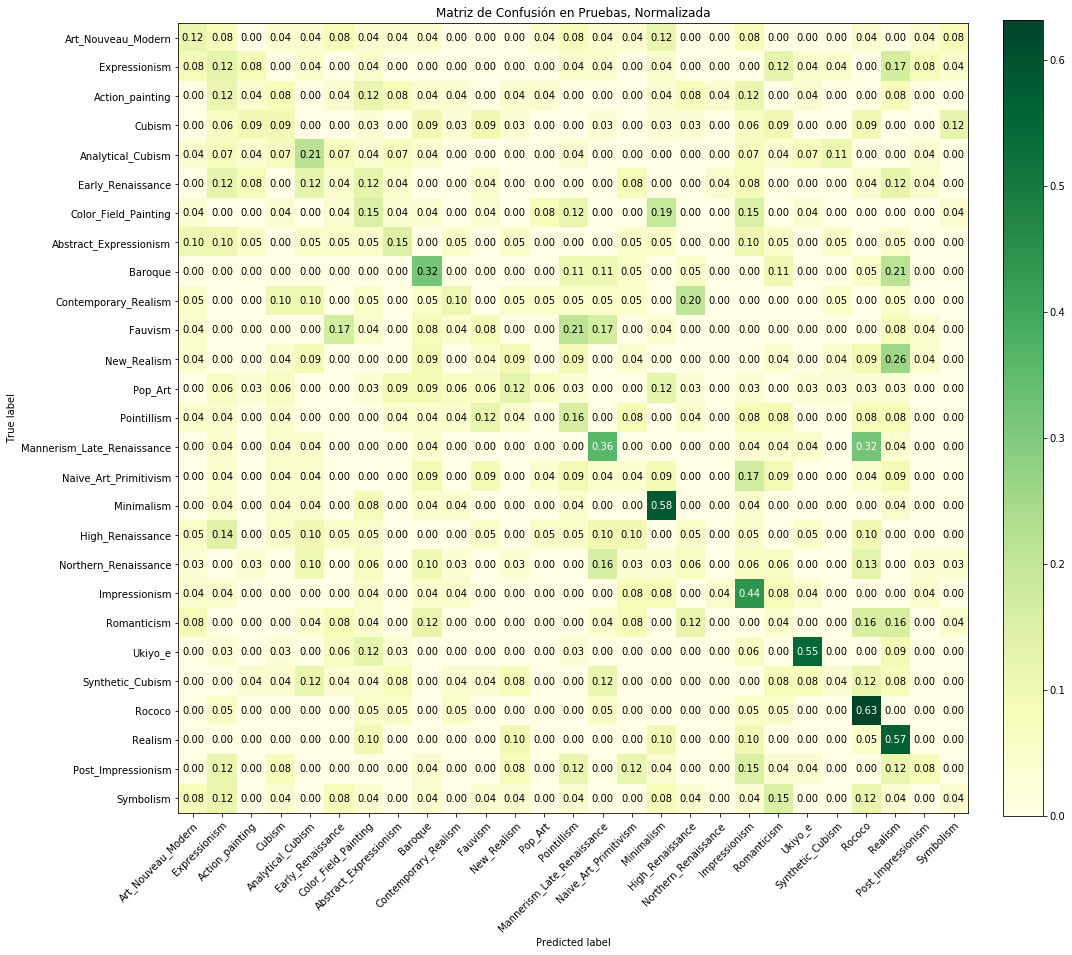

In [0]:
#A continuación, se hace el mismo experimento con un clasificador de Random Forest. Es muy similar al anteriormente
#implementado, solo se cambia el clasificador
test_size = 0.25

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print("Dimensiones en Train", d_train.shape, c_train.shape)
print("Dimensiones en Test", d_test.shape, c_test.shape)

#Se inicializa el clasificador con 100 estimadores
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(d_train, c_train)
print("Precisión en Train", rf.score(d_train, c_train))
print("Precisión en Test", rf.score(d_test, c_test))

pred_train = rf.predict(d_train)
pred_test  = rf.predict(d_test)

np.set_printoptions(precision=2)

plot_confusion_matrix(y_true = c_train,
                      y_pred = pred_train,
                      classes = class_names,
                      title = 'Matriz de Confusión en Entrenamiento, sin Normalizar',
                      normalize = False,
                      cmap = plt.cm.YlGn,
                      prnt_cm = False)

plot_confusion_matrix(y_true = c_train,
                      y_pred = pred_train,
                      classes = class_names,
                      title = 'Matriz de Confusión en Entrenamiento, Normalizada',
                      normalize = True,
                      cmap = plt.cm.YlGn,
                      prnt_cm = False)

plot_confusion_matrix(y_true = c_test,
                      y_pred = pred_test,
                      classes = class_names,
                      title = 'Matriz de Confusión en Pruebas, sin Normalizar',
                      normalize = False,
                      cmap = plt.cm.YlGn,
                      prnt_cm = False)

plot_confusion_matrix(y_true = c_test,
                      y_pred = pred_test,
                      classes = class_names,
                      title = 'Matriz de Confusión en Pruebas, Normalizada',
                      normalize = True,
                      cmap = plt.cm.YlGn,
                      prnt_cm = False)
plt.show()

##Pipelines

In [0]:
p = Pipeline((("pca", PCA(n_components=100)), ("classifier", RandomForestClassifier(n_estimators = 100)) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

In [0]:
p = Pipeline((("pca", PCA(n_components=100)), ("classifier", GaussianNB()) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

In [0]:
p = Pipeline((("pca", PCA(n_components=100)), ("classifier", SVC(kernel = 'poly', gamma = 'scale')) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

In [0]:
p = Pipeline((("pca", PCA(n_components=100)), ("classifier", SVC(kernel = 'rbf', gamma = 'scale')) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

In [0]:
p = Pipeline((("pca", PCA(n_components=100)), ("classifier", SVC(kernel = 'sigmoid', gamma = 'scale')) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

In [0]:
p = Pipeline((("pca", PCA(n_components=100)), ("classifier", SVC(kernel = 'linear', gamma = 'scale')) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

###Componentes vs Precisión

In [0]:
n_components = range(100,1000,100)
means, stds = [], []

for n in n_components:
    print (n),
    p = Pipeline((("pca", PCA(n_components=n)), ("classifier", GaussianNB()) ))
    s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

plt.plot(n_components, means, color="black")
plt.fill_between(n_components, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of PCA componets")
plt.ylabel("accuracy")
plt.title("GaussianNB")

In [0]:
n_components = range(100,1000,100)
means, stds = [], []

for n in n_components:
    print(n),
    p = Pipeline((("pca", PCA(n_components=n)), ("classifier", rf) ))
    s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

plt.plot(n_components, means, color="black")
plt.fill_between(n_components, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of PCA componets")
plt.ylabel("accuracy")
plt.title("RF")

##GridSearch

In [0]:
trees = range(95, 106)
depth = range(95, 106)
criteria = ['gini', 'entropy']

dict_grid = dict(n_estimators = trees, criterion = criteria, max_depth = depth)

grid = GridSearchCV(rf, dict_grid, cv = 2, scoring = 'accuracy', return_train_score = False, n_jobs= -1)
grid.fit(d_test, c_test)

pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

print(grid.best_score_)
print(grid.best_params_)

#Clasificación con Key Points

##Extracción de Key Points y Descriptores con ORB

In [0]:
#En esta celda se sacarán los descriptores de los keypoints de todas las imágenes que se encuentran guardadas en los arrays
#X y Y y se guardaran en un array. Se utiliza el método ORB para encontrar keypoints
#Se crea un directorio con la ruta de las imagenes
classes_names = os.listdir(path_classes)

#Se crean las listas y los directorios necesarios
array_imgs = []
array_imgs_classes = []
dic_imgs = {}

#Se guardan las rutas en el diccionario dic_imgs
for i, name_class in enumerate(classes_names):
    dic_imgs[classes_names[i]]=np.array(os.listdir(path_classes + classes_names[i]))

#Se guardan las rutas individuales de las imágenes en array_imgs y su etiqueta en array_imgs_classes
for i, classes in enumerate(classes_names):
    for im_name in dic_imgs[classes]:
        path_image = classes+'/'+im_name
        array_imgs.append(path_image)
        array_imgs_classes.append(i)

#Se convierten las listas a numpy array
img_dir_arr = np.r_[array_imgs]
img_class_dir_arr = np.r_[array_imgs_classes]

#Se inicializa la proporcion de división de datos
test_size = 0.2

#Se dividen los arrays en 80% de entrenamiento y 20% prueba
img_dir_arr_train, img_dir_arr_test, y_train, y_test = train_test_split(img_dir_arr, img_class_dir_arr, test_size = test_size)

#Se crea una instancia de extractor de desccriptores de keypoints de método ORB
descriptor_extractor = ORB(n_keypoints=200, fast_threshold = 0.01)

#Se crea una variable vacía que contendrá los descriptores
array_ORB = np.empty([200,256])

#Se itera por cada imagen en el conjunto de entrenamiento img_dir_arr_train
for i in log_progress(range(len(img_dir_arr_train)), every = 1):
    stream = open(path_classes + img_dir_arr_train[i], "rb") #linea para opencv en windows, borrar en ubuntu
    bytes = bytearray(stream.read()) #linea para opencv en windows, borrar en ubuntu
    img_array = np.asarray(bytes, dtype=np.uint8) #linea para opencv en windows, borrar en ubuntu
    img = cv.imdecode(img_array, 0) #linea para opencv en windows, borrar en ubuntu
    #Se detectan los keypoints en la imagen y se extraen
    descriptor_extractor.detect_and_extract(img)
    #Se obtiene el descriptor de lo extraido anteriormente
    descriptors1 = descriptor_extractor.descriptors
    #Se agrega el descriptor a array_ORB verticalmente
    array_ORB = np.vstack((array_ORB, descriptors1))

    
gc.collect()

print(array_ORB.shape)

In [0]:
#En las siguientes celdas se inicializa un clasificador de KMeans, para poder hacer un análisis de bolsa de palabras
#Se hace el clasificador con 70 palabras
v_words = 70
#Se entrena el clasificador con array_ORB
k = KMeans(n_clusters = v_words).fit(array_ORB)

In [0]:
#Se crea el diccionario de palabras con los cluster obtenidos en la anterior celda
visual_dictionary = k.cluster_centers_
print(visual_dictionary.shape)

In [0]:
#En esta celda se hará uso de histogramas los descriptores de keypoints
#Se crean los arrays que contendrán los histogramas y sus respectivos vectores de etiquetas
arr_h_train = []
arr_h_test = []
ya_train = []
ya_test = []

dic_classes = {}
for index, name in enumerate(classes_names):
    dic_classes[name] = index+1

#Se iteran las imágenes que se encuentran en el conjunto de entrenamiento
for i in log_progress((range(len(img_dir_arr_train))), every = 1):
    #Se inicializa el extractor de descriptor con el método ORB
    descriptor_extractor = ORB(n_keypoints=200, fast_threshold = 0.01)
    stream = open(path_classes + img_dir_arr_train[i], "rb") #linea para opencv en windows, borrar en ubuntu
    bytes = bytearray(stream.read()) #linea para opencv en windows, borrar en ubuntu
    img_array = np.asarray(bytes, dtype=np.uint8) #linea para opencv en windows, borrar en ubuntu
    img = cv.imdecode(img_array, 0) #linea para opencv en windows, borrar en ubuntu
    #Se sacan el descriptor de la imágen en un paso
    descriptor_extractor.detect_and_extract(img)
    des_img = descriptor_extractor.descriptors
    #Se genera el histograma del descriptor
    h_img = build_histogram(des_img, k)
    #Se agrega el histrograma a la lista correspondiente
    arr_h_train.append(h_img)
    #Se agrega la etiqueta correspondiente
    ya_train.append(os.path.basename(os.path.dirname(img_dir_arr_train[i])))
#Se convierten las listas a arrays
arr_h_train = np.r_[arr_h_train]
ya_train = np.r_[ya_train]
    
#Se hace el mismo procedimiento para las listan de prueba
for i in log_progress((range(len(img_dir_arr_test))), every = 1):
    descriptor_extractor = ORB(n_keypoints=200, fast_threshold = 0.01)
    stream = open(path_classes + img_dir_arr_test[i], "rb") #linea para opencv en windows, borrar en ubuntu
    bytes = bytearray(stream.read()) #linea para opencv en windows, borrar en ubuntu
    img_array = np.asarray(bytes, dtype=np.uint8) #linea para opencv en windows, borrar en ubuntu
    img = cv.imdecode(img_array, 0) #linea para opencv en windows, borrar en ubuntu
    descriptor_extractor.detect_and_extract(img)
    des_img = descriptor_extractor.descriptors
    h_img = build_histogram(des_img, k)
    arr_h_test.append(h_img)
    ya_test.append(os.path.basename(os.path.dirname(img_dir_arr_test[i])))
    
arr_h_test = np.r_[arr_h_test]
ya_test = np.r_[ya_test]

##Clasificación via Key Points

In [0]:
#Se hace una clasificación con KNN
KN_est = KNeighborsClassifier(n_neighbors=70)
#Se entrenan los datos
KN_est.fit(arr_h_train, ya_train)
KN_pr = KN_est.predict(arr_h_test)
print(KN_est.score(arr_h_test, ya_test))
cm_test = confusion_matrix(ya_test, KN_pr)

#Se imprime la matríz de confusión
plt.subplot(141), plt.title('Matríz de Confusión en Test'), plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.subplot(141), plt.colorbar();

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

In [0]:
#Se hace una clasificación con GNB
GN_est = GaussianNB()
#Se entrenan los datos
GN_est.fit(arr_h_train, ya_train)
GN_pr = GN_est.predict(arr_h_test)
print(GN_est.score(arr_h_test, ya_test))
cm_test = confusion_matrix(ya_test, GN_pr)

#Se imprime la matríz de confusión
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

In [0]:
#Se hace una clasificación con Random Forest
RF_est = RandomForestClassifier(n_estimators = 103, max_depth = 102)
#Se entrenan los datos
RF_est.fit(arr_h_train, ya_train)
RF_pr = RF_est.predict(arr_h_test)
print(RF_est.score(arr_h_test, ya_test))
cm_test = confusion_matrix(ya_test, RF_pr)

#Se imprime la matríz de confusión
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

In [0]:
#Se hace una clasificación con SVC
SV_est = SVC(C = 1.1116,
             kernel='rbf',
             gamma = 'scale',
             shrinking = True,
             tol = .018,
             class_weight = 'balanced',
             verbose = True,
             decision_function_shape = 'ovo'
            )
#Se entrenan los datos
SV_est.fit(arr_h_train, ya_train)
SV_pr = SV_est.predict(arr_h_test)
print(SV_est.score(arr_h_test, ya_test))
cm_test = confusion_matrix(ya_test, SV_pr)

#Se imprime la matríz de confusión
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

#Deep Features

## ResNet50

In [0]:
model_ResNet50 = tf.keras.applications.ResNet50(weights='imagenet')
model_ResNet50.summary()

W0819 21:51:42.469316 140644592269184 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


102866944/102853048 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
________________________

In [0]:
model_fc_Resnet = tf.keras.models.Model(inputs=model_ResNet50.input, 
                        outputs=model_ResNet50.get_layer('avg_pool').output)

In [0]:
path_classes = 'gdrive/My Drive/CVAI/artsource_dataset/'
classes_names = os.listdir(path_classes)
print(classes_names[0:26])
classes_names = classes_names[0:26]

list_imgs = []
for i, name_class in enumerate(classes_names):
    list_imgs = list_imgs +[name_class+ "/"+ s for s in (os.listdir(path_classes + classes_names[i]))]
print (len(list_imgs))
array_imgs = np.array(list_imgs)
print (array_imgs[0], array_imgs.shape)

perm = np.random.permutation(len(list_imgs))
perm_arr_images = array_imgs[perm]

val_train = int(perm_arr_images.shape[0]*0.8)
array_imgs_train = perm_arr_images[0:val_train]
array_imgs_test  = perm_arr_images[val_train:]


print (array_imgs_train.shape, array_imgs_test.shape)
print (array_imgs_train.shape[0]+ array_imgs_test.shape[0])
print (array_imgs_test[69])

print (classes_names)
dic_classes = {}
for index, name in enumerate(classes_names):
    dic_classes[name] = index+1 

['Art_Nouveau_Modern', 'Expressionism', 'Action_painting', 'Cubism', 'Analytical_Cubism', 'Early_Renaissance', 'Color_Field_Painting', 'Abstract_Expressionism', 'Baroque', 'Contemporary_Realism', 'Fauvism', 'New_Realism', 'Pop_Art', 'Pointillism', 'Mannerism_Late_Renaissance', 'Naive_Art_Primitivism', 'Minimalism', 'High_Renaissance', 'Northern_Renaissance', 'Impressionism', 'Romanticism', 'Ukiyo_e', 'Synthetic_Cubism', 'Rococo', 'Realism', 'Post_Impressionism']
2597
('Art_Nouveau_Modern/a.y.-jackson_north-shore-lake-superior-1926.jpg', (2597,))
((2077,), (520,))
2597
Mannerism_Late_Renaissance/andrea-del-sarto_the-annunciation.jpg
['Art_Nouveau_Modern', 'Expressionism', 'Action_painting', 'Cubism', 'Analytical_Cubism', 'Early_Renaissance', 'Color_Field_Painting', 'Abstract_Expressionism', 'Baroque', 'Contemporary_Realism', 'Fauvism', 'New_Realism', 'Pop_Art', 'Pointillism', 'Mannerism_Late_Renaissance', 'Naive_Art_Primitivism', 'Minimalism', 'High_Renaissance', 'Northern_Renaissance',

In [0]:
def LMID_CNN(path, layer):
    classes_names = os.listdir(path)
    dic_imgs ={}
    print(classes_names)
    for i, name_class in enumerate(classes_names):
        dic_imgs[classes_names[i]] = np.array(os.listdir(path + classes_names[i]))

    X =[]
    y =[]

    for i, classes in log_progress(enumerate(classes_names), every = 1):
        print(classes)
        for im_name in log_progress(dic_imgs[classes], every = 1):
            path_image = path+classes+'/'+im_name
        
            im = tf.contrib.keras.preprocessing.image.load_img(path_image, target_size=(224, 224))
            im = tf.contrib.keras.preprocessing.image.img_to_array(im)
            im = np.expand_dims(im, axis=0)
            features = layer.predict(im)
            features = features.reshape(features.shape[1])
            X.append(features)
            y.append(i)

    X = np.r_[X]        
    y = np.r_[y]

    return X, y

In [0]:
path_classes_f = 'gdrive/My Drive/CVAI/artsource_dataset/'
X_f, y_f = LMID_CNN(path_classes_f, model_fc_Resnet)

test_size = 0.2
kX_f_train, kX_f_test, ky_f_train, ky_f_test = train_test_split(X_f, y_f, test_size = test_size)

['Art_Nouveau_Modern', 'Expressionism', 'Action_painting', 'Cubism', 'Analytical_Cubism', 'Early_Renaissance', 'Color_Field_Painting', 'Abstract_Expressionism', 'Baroque', 'Contemporary_Realism', 'Fauvism', 'New_Realism', 'Pop_Art', 'Pointillism', 'Mannerism_Late_Renaissance', 'Naive_Art_Primitivism', 'Minimalism', 'High_Renaissance', 'Northern_Renaissance', 'Impressionism', 'Romanticism', 'Ukiyo_e', 'Synthetic_Cubism', 'Rococo', 'Realism', 'Post_Impressionism', 'Symbolism']


Art_Nouveau_Modern


W0819 21:51:56.818928 140644592269184 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Expressionism


Action_painting


Cubism


KeyboardInterrupt: ignored

In [0]:
#kX_f_train, kX_f_test, ky_f_train, ky_f_test
RF = RandomForestClassifier(n_estimators = 100)
KNN = KNeighborsClassifier(n_neighbors=21)
GNB = GaussianNB()
SVM_lin = SVC(kernel='linear', gamma = 'scale')
SVM_rbf = SVC(kernel='rbf', gamma = 'scale')
SVM_poly = SVC(kernel='poly', gamma = 'scale')
SVM_sig = SVC(kernel='sigmoid', gamma = 'scale')

RF.fit(kX_f_train, ky_f_train)
KNN.fit(kX_f_train, ky_f_train)
GNB.fit(kX_f_train, ky_f_train)
SVM_lin.fit(kX_f_train, ky_f_train)
SVM_rbf.fit(kX_f_train, ky_f_train)
SVM_poly.fit(kX_f_train, ky_f_train)
SVM_sig.fit(kX_f_train, ky_f_train)

score_RF = RF.score(kX_f_test, ky_f_test)
score_KNN = KNN.score(kX_f_test, ky_f_test)
score_GNB = GNB.score(kX_f_test, ky_f_test)
score_SVM_lin = SVM_lin.score(kX_f_test, ky_f_test)
score_SVM_rbf = SVM_rbf.score(kX_f_test, ky_f_test)
score_SVM_poly = SVM_poly.score(kX_f_test, ky_f_test)
score_SVM_sig = SVM_sig.score(kX_f_test, ky_f_test)

print ('acc RF: ', score_RF)
print ('acc KNN: ', score_KNN)
print ('acc GNB: ', score_GNB)
print ('acc SVM+linear', score_SVM_lin)
print ('acc SVM+rbf', score_SVM_rbf)
print ('acc SVM+poly', score_SVM_poly)
print ('acc SVM+sig', score_SVM_sig)

NameError: ignored

In [0]:
#kX_f_train, kX_f_test, ky_f_train, ky_f_test
pred_train = SVM_lin.predict(kX_f_train)
pred_test  = SVM_lin.predict(kX_f_test)

cm_train_SVM_lin = confusion_matrix(ky_f_train, pred_train)
cm_test_SVM_lin = confusion_matrix(ky_f_test, pred_test)

print 'SVM, kernel lineal'
print score_SVM_lin
plt.imshow(cm_test_SVM_lin, interpolation="nearest", cmap=plt.cm.Blues),plt.colorbar();

NameError: ignored

In [0]:
pred_train = SVM_lin.predict(kX_f_train)
pred_test  = SVM_lin.predict(kX_f_test)

print("Número de Imagenes por Clase en Test")
print(np.sum(cm_test_SVM_lin, axis=1))

np.set_printoptions(precision=2)

plot_confusion_matrix(y_true = ky_f_train,
                      y_pred = pred_train,
                      classes = class_names,
                      title = 'Matriz de Confusión en Entrenamiento, sin Normalizar',
                      normalize = False,
                      cmap = plt.cm.YlGn,
                      prnt_cm = False)

plot_confusion_matrix(y_true = ky_f_train,
                      y_pred = pred_train,
                      classes = class_names,
                      title = 'Matriz de Confusión en Entrenamiento, Normalizada',
                      normalize = True,
                      cmap = plt.cm.YlGn,
                      prnt_cm = False)

plot_confusion_matrix(y_true = ky_f_test,
                      y_pred = pred_test,
                      classes = class_names,
                      title = 'Matriz de Confusión en Pruebas, sin Normalizar',
                      normalize = False,
                      cmap = plt.cm.YlGn,
                      prnt_cm = False)

plot_confusion_matrix(y_true = ky_f_test,
                      y_pred = pred_test,
                      classes = class_names,
                      title = 'Matriz de Confusión en Pruebas, Normalizada',
                      normalize = True,
                      cmap = plt.cm.YlGn,
                      prnt_cm = False)
plt.show()

Número de Imagenes por Clase en Test


NameError: ignored

## VGG16

In [0]:
model_vgg16 = tf.keras.applications.VGG16(weights='imagenet')
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
model_fc_vgg16 = tf.keras.models.Model(inputs=model_vgg16.input, 
                        outputs=model_vgg16.get_layer('fc2').output)

In [0]:
path_classes_f = 'gdrive/My Drive/CVAI/artsource_dataset/'
X_f, y_f = LMID_CNN(path_classes_f, model_fc_vgg16)

test_size = 0.2
kX_f_train, kX_f_test, ky_f_train, ky_f_test = train_test_split(X_f, y_f, test_size = test_size)

['Art_Nouveau_Modern', 'Expressionism', 'Action_painting', 'Cubism', 'Analytical_Cubism', 'Early_Renaissance', 'Color_Field_Painting', 'Abstract_Expressionism', 'Baroque', 'Contemporary_Realism', 'Fauvism', 'New_Realism', 'Pop_Art', 'Pointillism', 'Mannerism_Late_Renaissance', 'Naive_Art_Primitivism', 'Minimalism', 'High_Renaissance', 'Northern_Renaissance', 'Impressionism', 'Romanticism', 'Ukiyo_e', 'Synthetic_Cubism', 'Rococo', 'Realism', 'Post_Impressionism', 'Symbolism']


Art_Nouveau_Modern


Expressionism


Action_painting


Cubism


Analytical_Cubism


Early_Renaissance


Color_Field_Painting


Abstract_Expressionism


Baroque


Contemporary_Realism


Fauvism


New_Realism


Pop_Art


Pointillism


Mannerism_Late_Renaissance


IOError: ignored

In [0]:
#kX_f_train, kX_f_test, ky_f_train, ky_f_test
RF = RandomForestClassifier(n_estimators = 100)
KNN = KNeighborsClassifier(n_neighbors=21)
GNB = GaussianNB()
SVM_lin = SVC(kernel='linear', gamma = 'scale')
SVM_rbf = SVC(kernel='rbf', gamma = 'scale')
SVM_poly = SVC(kernel='poly', gamma = 'scale')
SVM_sig = SVC(kernel='sigmoid', gamma = 'scale')

RF.fit(kX_f_train, ky_f_train)
KNN.fit(kX_f_train, ky_f_train)
GNB.fit(kX_f_train, ky_f_train)
SVM_lin.fit(kX_f_train, ky_f_train)
SVM_rbf.fit(kX_f_train, ky_f_train)
SVM_poly.fit(kX_f_train, ky_f_train)
SVM_sig.fit(kX_f_train, ky_f_train)

score_RF = RF.score(kX_f_test, ky_f_test)
score_KNN = KNN.score(kX_f_test, ky_f_test)
score_GNB = GNB.score(kX_f_test, ky_f_test)
score_SVM_lin = SVM_lin.score(kX_f_test, ky_f_test)
score_SVM_rbf = SVM_rbf.score(kX_f_test, ky_f_test)
score_SVM_poly = SVM_poly.score(kX_f_test, ky_f_test)
score_SVM_sig = SVM_sig.score(kX_f_test, ky_f_test)

print ('acc RF: ', score_RF)
print ('acc KNN: ', score_KNN)
print ('acc GNB: ', score_GNB)
print ('acc SVM+linear', score_SVM_lin)
print ('acc SVM+rbf', score_SVM_rbf)
print ('acc SVM+poly', score_SVM_poly)
print ('acc SVM+sig', score_SVM_sig)

# Transfer Learning

## Mobilenet

In [0]:
model_A = tf.keras.applications.MobileNet(weights='imagenet')
model_A.summary()

In [0]:
path_classes = 'gdrive/My Drive/CVAI/artsource_dataset/'
ker_size = 15
ker_size = (ker_size,) * 2
resize = 224
class_names = np.r_[os.listdir(path_classes)]

In [0]:
X, y = LMIDKeras(path_classes, resize)

In [0]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

print y_train.shape, y_test.shape

(2156,) (540,)


In [0]:
model_B_on_A = tf.keras.models.Sequential(model_A.layers[:-2])
model_B_on_A.add(tf.keras.layers.GlobalAvgPool2D(input_shape=(1,1,1000)))
model_B_on_A.add(tf.keras.layers.Dense(27, activation='sigmoid'))
for layer in model_B_on_A.layers[:]:
    layer.trainable = False

NameError: ignored

In [0]:
for layer in model_B_on_A.layers[50:-2]:
    layer.trainable = False

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model_B_on_A.fit(X_train, y_train, epochs=20, batch_size=32,validation_data=(X_test, y_test))

Train on 2156 samples, validate on 540 samples
Epoch 1/20
2156/2156 [==============================] - 24s 11ms/sample - loss: 3.1961 - acc: 0.0965 - val_loss: 2.8671 - val_acc: 0.1093
Epoch 2/20
2156/2156 [==============================] - 15s 7ms/sample - loss: 2.5342 - acc: 0.1229 - val_loss: 2.1776 - val_acc: 0.1685
Epoch 3/20
2156/2156 [==============================] - 15s 7ms/sample - loss: 1.6873 - acc: 0.3599 - val_loss: 1.2654 - val_acc: 0.6352
Epoch 4/20
2156/2156 [==============================] - 16s 7ms/sample - loss: 1.0053 - acc: 0.7032 - val_loss: 0.8653 - val_acc: 0.7593
Epoch 5/20
2156/2156 [==============================] - 16s 7ms/sample - loss: 0.7347 - acc: 0.7746 - val_loss: 0.7402 - val_acc: 0.8056
Epoch 6/20
2156/2156 [==============================] - 16s 7ms/sample - loss: 0.5847 - acc: 0.8182 - val_loss: 0.6685 - val_acc: 0.8111
Epoch 7/20
2156/2156 [==============================] - 16s 7ms/sample - loss: 0.4553 - acc: 0.8646 - val_loss: 0.6224 - val_acc: 

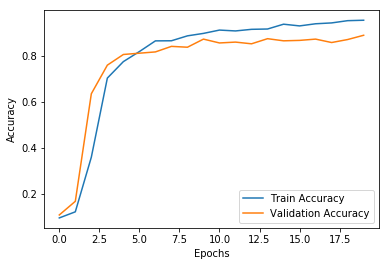

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
for layer in model_B_on_A.layers[50:-2]:
    layer.trainable = True

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model_B_on_A.fit(X_train, y_train, epochs=2, batch_size=50,validation_data=(X_test, y_test))

Train on 2156 samples, validate on 540 samples
Epoch 1/2
2156/2156 [==============================] - 43s 20ms/sample - loss: 0.0768 - acc: 0.9717 - val_loss: 0.4671 - val_acc: 0.8833
Epoch 2/2
2156/2156 [==============================] - 31s 14ms/sample - loss: 0.0641 - acc: 0.9750 - val_loss: 0.4915 - val_acc: 0.8759


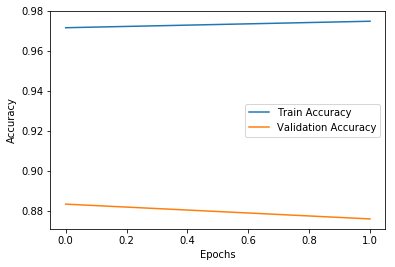

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## ResNet50

In [0]:
model_A = tf.keras.applications.ResNet50(weights='imagenet')
model_A.summary()

W0815 16:50:51.855915 139830842804096 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


102866944/102853048 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
________________________

In [0]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

model_resnet50 = Sequential()
model_resnet50.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
model_resnet50.add(Dense(27, activation = 'softmax'))
model_resnet50.layers[0].trainable = False

94666752/94653016 [==============================] - 2s 0us/step


In [0]:
model_resnet50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 27)                55323     
Total params: 23,643,035
Trainable params: 55,323
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_resnet50.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model_resnet50.fit(X_train, y_train, epochs=20, batch_size=20,validation_data=(X_test, y_test))

Train on 2156 samples, validate on 540 samples
Epoch 1/20
2156/2156 [==============================] - 14s 7ms/sample - loss: 2.7836 - acc: 0.2319 - val_loss: 2.4343 - val_acc: 0.3000
Epoch 2/20
2156/2156 [==============================] - 10s 5ms/sample - loss: 1.7942 - acc: 0.5019 - val_loss: 2.1644 - val_acc: 0.3741
Epoch 3/20
2156/2156 [==============================] - 11s 5ms/sample - loss: 1.4557 - acc: 0.5881 - val_loss: 2.0289 - val_acc: 0.4185
Epoch 4/20
2156/2156 [==============================] - 11s 5ms/sample - loss: 1.2514 - acc: 0.6461 - val_loss: 2.0500 - val_acc: 0.4056
Epoch 5/20
2156/2156 [==============================] - 11s 5ms/sample - loss: 1.1253 - acc: 0.6929 - val_loss: 1.9549 - val_acc: 0.4296
Epoch 6/20
2156/2156 [==============================] - 11s 5ms/sample - loss: 1.0127 - acc: 0.7185 - val_loss: 2.0686 - val_acc: 0.4204
Epoch 7/20
2156/2156 [==============================] - 11s 5ms/sample - loss: 0.9296 - acc: 0.7509 - val_loss: 2.0566 - val_acc: 0

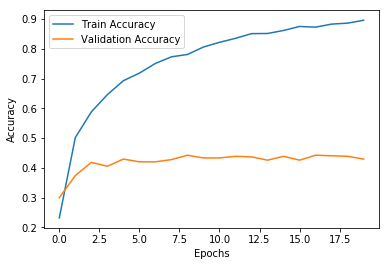

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
model_resnet50.layers[0].trainable = True

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_resnet50.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model_resnet50.fit(X_train, y_train, epochs=2, batch_size=20,validation_data=(X_test, y_test))

Train on 2156 samples, validate on 540 samples
Epoch 1/2
2156/2156 [==============================] - 38s 18ms/sample - loss: 0.3879 - acc: 0.9109 - val_loss: 1.3789 - val_acc: 0.6167
Epoch 2/2
2156/2156 [==============================] - 31s 14ms/sample - loss: 0.1839 - acc: 0.9736 - val_loss: 1.3967 - val_acc: 0.6148


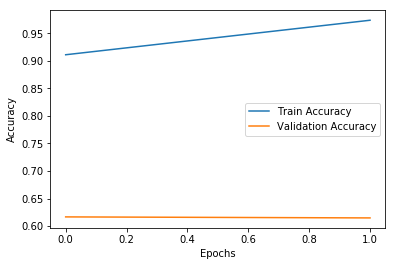

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
history = model_resnet50.fit(X_train, y_train, epochs=5, batch_size=64,validation_data=(X_test, y_test))

Train on 2156 samples, validate on 540 samples
Epoch 1/5
2156/2156 [==============================] - 36s 16ms/sample - loss: 0.0593 - acc: 0.9884 - val_loss: 1.3657 - val_acc: 0.6278
Epoch 2/5
2156/2156 [==============================] - 29s 13ms/sample - loss: 0.0482 - acc: 0.9865 - val_loss: 1.3388 - val_acc: 0.6278
Epoch 3/5
2156/2156 [==============================] - 29s 13ms/sample - loss: 0.0419 - acc: 0.9870 - val_loss: 1.3294 - val_acc: 0.6352
Epoch 4/5
2156/2156 [==============================] - 29s 13ms/sample - loss: 0.0388 - acc: 0.9870 - val_loss: 1.3296 - val_acc: 0.6370
Epoch 5/5
2156/2156 [==============================] - 29s 13ms/sample - loss: 0.0364 - acc: 0.9875 - val_loss: 1.3257 - val_acc: 0.6389


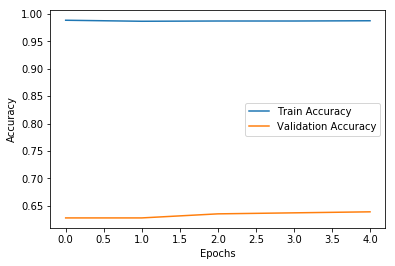

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## VGG16

In [0]:
from tensorflow.python.keras.applications import VGG16


model_vgg = Sequential()
model_vgg.add(VGG16(include_top = False, pooling = 'avg', weights = 'imagenet'))
model_vgg.add(Dense(27, activation = 'softmax'))
model_vgg.layers[0].trainable = False
model_vgg.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 27)                13851     
Total params: 14,728,539
Trainable params: 13,851
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_vgg.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model_vgg.fit(X_train, y_train, epochs=20, batch_size=20,validation_data=(X_test, y_test))

Train on 2156 samples, validate on 540 samples
Epoch 1/20
2156/2156 [==============================] - 20s 9ms/sample - loss: 6.1045 - acc: 0.2588 - val_loss: 3.6857 - val_acc: 0.4167
Epoch 2/20
2156/2156 [==============================] - 18s 8ms/sample - loss: 2.6950 - acc: 0.5227 - val_loss: 3.4515 - val_acc: 0.4333
Epoch 3/20
2156/2156 [==============================] - 17s 8ms/sample - loss: 1.7660 - acc: 0.6229 - val_loss: 2.8810 - val_acc: 0.4741
Epoch 4/20
2156/2156 [==============================] - 17s 8ms/sample - loss: 1.3597 - acc: 0.6827 - val_loss: 3.1199 - val_acc: 0.4815
Epoch 5/20
2156/2156 [==============================] - 17s 8ms/sample - loss: 1.0638 - acc: 0.7147 - val_loss: 3.1060 - val_acc: 0.4944
Epoch 6/20
2156/2156 [==============================] - 17s 8ms/sample - loss: 0.8491 - acc: 0.7621 - val_loss: 3.1906 - val_acc: 0.4963
Epoch 7/20
2156/2156 [==============================] - 17s 8ms/sample - loss: 0.6360 - acc: 0.8186 - val_loss: 3.0722 - val_acc: 0

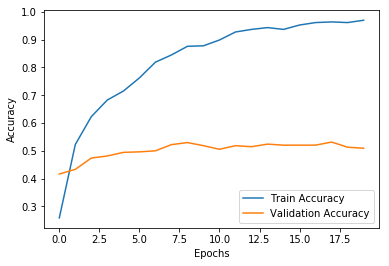

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
model_vgg.layers[0].trainable = True

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model_vgg.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model_vgg.fit(X_train, y_train, epochs=2, batch_size=20,validation_data=(X_test, y_test))<

Train on 2156 samples, validate on 540 samples
Epoch 1/2
2156/2156 [==============================] - 42s 20ms/sample - loss: 3.3133 - acc: 0.0724 - val_loss: 3.2957 - val_acc: 0.0407
Epoch 2/2
2156/2156 [==============================] - 38s 18ms/sample - loss: 3.2961 - acc: 0.0311 - val_loss: 3.2961 - val_acc: 0.0407


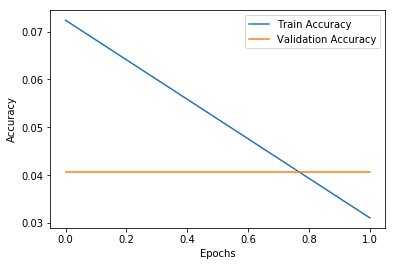

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
history = model_vgg.fit(X_train, y_train, epochs=20, batch_size=20,validation_data=(X_test, y_test))

Train on 2156 samples, validate on 540 samples
Epoch 1/20
2156/2156 [==============================] - 37s 17ms/sample - loss: 3.2960 - acc: 0.0362 - val_loss: 3.2966 - val_acc: 0.0259
Epoch 2/20
2156/2156 [==============================] - 38s 18ms/sample - loss: 3.2959 - acc: 0.0399 - val_loss: 3.2968 - val_acc: 0.0259
Epoch 3/20
2156/2156 [==============================] - 38s 18ms/sample - loss: 3.2958 - acc: 0.0399 - val_loss: 3.2972 - val_acc: 0.0259
Epoch 4/20
2156/2156 [==============================] - 38s 18ms/sample - loss: 3.2957 - acc: 0.0399 - val_loss: 3.2975 - val_acc: 0.0259
Epoch 5/20
2156/2156 [==============================] - 38s 18ms/sample - loss: 3.2957 - acc: 0.0348 - val_loss: 3.2979 - val_acc: 0.0259
Epoch 6/20
2156/2156 [==============================] - 38s 18ms/sample - loss: 3.2956 - acc: 0.0353 - val_loss: 3.2982 - val_acc: 0.0185
Epoch 7/20
2156/2156 [==============================] - 38s 18ms/sample - loss: 3.2955 - acc: 0.0417 - val_loss: 3.2985 - val

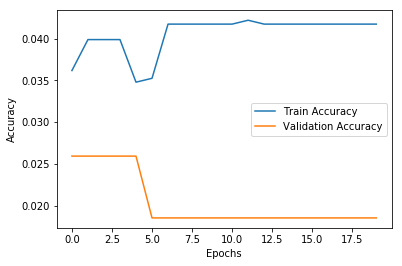

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Inception V3

In [0]:
from tensorflow.python.keras.applications import InceptionV3


model_in = Sequential()
model_in.add(InceptionV3(include_top = False, pooling = 'avg', weights = 'imagenet'))
model_in.add(Dense(27, activation = 'softmax'))
model_in.layers[0].trainable = False
model_in.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_6 (Dense)              (None, 27)                55323     
Total params: 21,858,107
Trainable params: 55,323
Non-trainable params: 21,802,784
_________________________________________________________________


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_in.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model_in.fit(X_train, y_train, epochs=20, batch_size=20,validation_data=(X_test, y_test))

Train on 2156 samples, validate on 540 samples
Epoch 1/20
2156/2156 [==============================] - 13s 6ms/sample - loss: 3.2996 - acc: 0.0663 - val_loss: 36.3200 - val_acc: 0.0259
Epoch 2/20
2156/2156 [==============================] - 7s 3ms/sample - loss: 2.9876 - acc: 0.1837 - val_loss: 45.2068 - val_acc: 0.0259
Epoch 3/20
2156/2156 [==============================] - 7s 3ms/sample - loss: 2.7443 - acc: 0.2755 - val_loss: 59.6310 - val_acc: 0.0296
Epoch 4/20
2156/2156 [==============================] - 7s 3ms/sample - loss: 2.5356 - acc: 0.3609 - val_loss: 62.1476 - val_acc: 0.0352
Epoch 5/20
2156/2156 [==============================] - 7s 3ms/sample - loss: 2.3832 - acc: 0.3938 - val_loss: 62.7625 - val_acc: 0.0333
Epoch 6/20
2156/2156 [==============================] - 7s 3ms/sample - loss: 2.2474 - acc: 0.4402 - val_loss: 70.6837 - val_acc: 0.0352
Epoch 7/20
2156/2156 [==============================] - 7s 3ms/sample - loss: 2.1386 - acc: 0.4810 - val_loss: 74.2857 - val_acc: 

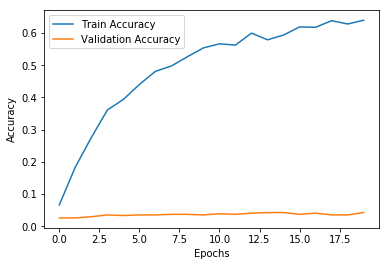

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
model_in.layers[0].trainable = True

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model_in.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model_in.fit(X_train, y_train, epochs=3, batch_size=20,validation_data=(X_test, y_test))

Train on 2156 samples, validate on 540 samples
Epoch 1/3
2156/2156 [==============================] - 35s 16ms/sample - loss: 1.3601 - acc: 0.6628 - val_loss: 1.8504 - val_acc: 0.4444
Epoch 2/3
2156/2156 [==============================] - 22s 10ms/sample - loss: 1.1686 - acc: 0.7096 - val_loss: 1.7063 - val_acc: 0.5037
Epoch 3/3
2156/2156 [==============================] - 22s 10ms/sample - loss: 1.0354 - acc: 0.7574 - val_loss: 1.6761 - val_acc: 0.4963


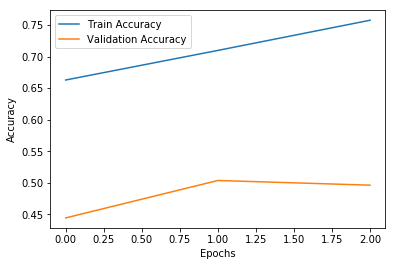

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_in.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model_in.fit(X_train, y_train, epochs=20, batch_size=20,validation_data=(X_test, y_test))

Train on 2156 samples, validate on 540 samples
Epoch 1/20
2156/2156 [==============================] - 33s 15ms/sample - loss: 0.9731 - acc: 0.7486 - val_loss: 1.5656 - val_acc: 0.5296
Epoch 2/20
2156/2156 [==============================] - 22s 10ms/sample - loss: 0.4938 - acc: 0.8933 - val_loss: 1.4556 - val_acc: 0.5833
Epoch 3/20
2156/2156 [==============================] - 22s 10ms/sample - loss: 0.2591 - acc: 0.9564 - val_loss: 1.3915 - val_acc: 0.5963
Epoch 4/20
2156/2156 [==============================] - 22s 10ms/sample - loss: 0.1836 - acc: 0.9708 - val_loss: 1.4381 - val_acc: 0.5667
Epoch 5/20
2156/2156 [==============================] - 22s 10ms/sample - loss: 0.1264 - acc: 0.9819 - val_loss: 1.3956 - val_acc: 0.5981
Epoch 6/20
2156/2156 [==============================] - 22s 10ms/sample - loss: 0.0991 - acc: 0.9805 - val_loss: 1.4280 - val_acc: 0.5815
Epoch 7/20
2156/2156 [==============================] - 22s 10ms/sample - loss: 0.0788 - acc: 0.9842 - val_loss: 1.4487 - val

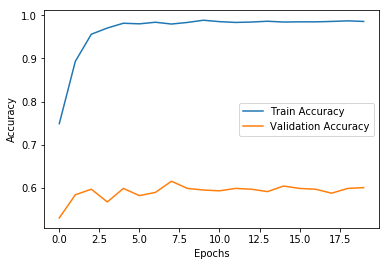

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()